In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [ ]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DL Project/train_dataset'
valid_path = '/content/drive/MyDrive/DL Project/validate'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/DL Project/train_dataset/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

Assigning Cost and Optimization method to the model

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Performing Preprocessing on the input Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/train_dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 115 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/validate',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 87 images belonging to 5 classes.


Fit the Model

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
4/4 [==============================] - 67s 18s/step - loss: 5.1229 - accuracy: 0.3130 - val_loss: 12.6687 - val_accuracy: 0.1609
Epoch 2/10
4/4 [==============================] - 36s 11s/step - loss: 2.5509 - accuracy: 0.6609 - val_loss: 11.5325 - val_accuracy: 0.2184
Epoch 3/10
4/4 [==============================] - 28s 7s/step - loss: 0.7111 - accuracy: 0.8435 - val_loss: 15.6541 - val_accuracy: 0.2184
Epoch 4/10
4/4 [==============================] - 36s 10s/step - loss: 0.4927 - accuracy: 0.8870 - val_loss: 16.9409 - val_accuracy: 0.2759
Epoch 5/10
4/4 [==============================] - 36s 11s/step - loss: 0.2044 - accuracy: 0.9565 - val_loss: 20.6316 - val_accuracy: 0.2529
Epoch 6/10
4/4 [==============================] - 36s 11s/step - loss: 0.3453 - accuracy: 0.9652 - val_loss: 18.9486 - val_accuracy: 0.2184
Epoch 7/10
4/4 [==============================] - 26s 7s/step - loss: 0.0447 - accuracy: 0.9739 - val_loss: 19.5595 - val_accuracy: 0.2759
Epoch 8/10
4/4 [======

In [ ]:
import matplotlib.pyplot as plt

plot the loss

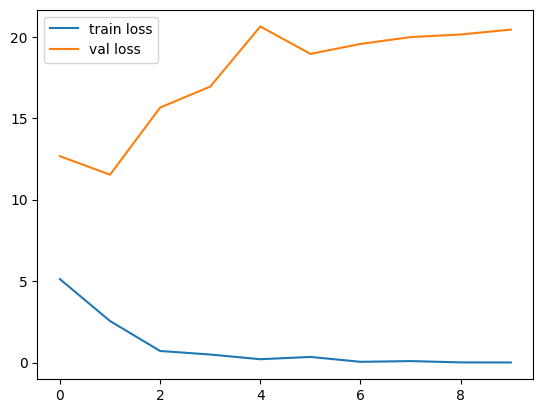

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plot the accuracy

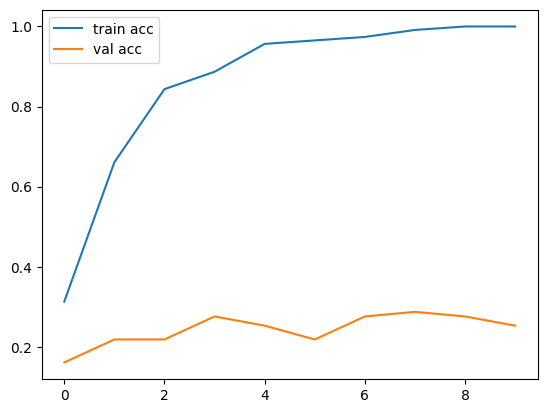

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)
y_pred

3/3 [==============================] - 13s 3s/step


array([[6.88795598e-09, 9.99999940e-01, 4.00481286e-15, 5.71539697e-23,
        2.99126811e-26],
       [3.30205641e-10, 1.15006850e-18, 1.27763511e-03, 3.65306306e-07,
        9.98722017e-01],
       [2.05626656e-26, 9.96669288e-35, 6.18342231e-24, 2.23438477e-16,
        9.99999940e-01],
       [2.96871207e-07, 7.44200928e-34, 1.79815065e-24, 5.65267503e-02,
        9.43472922e-01],
       [1.58797902e-05, 3.27193004e-12, 9.99961317e-01, 3.42594464e-09,
        2.27170949e-05],
       [1.11719259e-26, 2.00112641e-30, 1.41883366e-21, 4.91637675e-10,
        9.99999940e-01],
       [3.21454206e-03, 1.29335386e-18, 1.60693924e-14, 9.96785522e-01,
        1.83616880e-15],
       [1.39530731e-11, 9.99999940e-01, 2.14716118e-19, 3.81570600e-24,
        2.50905820e-28],
       [3.09010392e-14, 9.99999940e-01, 1.14859016e-21, 9.96127107e-25,
        1.60661358e-30],
       [7.37471301e-25, 1.53611053e-28, 1.01742424e-20, 2.24043020e-10,
        9.99999940e-01],
       [3.29406251e-26, 0.0000

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 4, 4, 4, 2, 4, 3, 1, 1, 4, 3, 2, 3, 2, 0, 4, 1, 0, 0, 4, 4, 2,
       2, 4, 0, 0, 0, 3, 4, 4, 2, 2, 3, 0, 0, 2, 4, 2, 1, 0, 4, 0, 4, 4,
       2, 0, 3, 4, 2, 3, 4, 0, 3, 3, 0, 4, 4, 0, 0, 3, 1, 3, 2, 0, 2, 4,
       3, 4, 4, 4, 3, 3, 2, 2, 1, 3, 4, 4, 3, 3, 0, 4, 2, 2, 4, 4, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/model_inception.h5')

In [ ]:
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
def pred(img_path):
    img = load_img(img_path,target_size = (224,224)) #Load the image and set the target size to the size of input of our model
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = preprocess_input(x)
    p = np.argmax(model.predict(x))
    if p==0:     # P=0 for basal,P=1 for melanoma , P=2 for squamous
        print("Sorry!! You've enetered Irrelevent Data")
    elif p==1:
        print("Moderate Pollution")
    elif p==2:
        print("No Pollution")
    elif p==3:
        print("Severe Pollution")


In [ ]:
import cv2
import glob

1/1 [==============================] - 2s 2s/step
Moderate Pollution


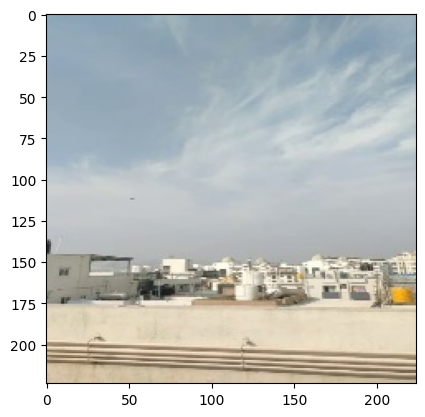

In [ ]:
pred('/content/drive/MyDrive/DL Project/validate/moderate/BENGR_Mod_2023-03-09-08.30-1-226.jpg')
z = plt.imread('/content/drive/MyDrive/DL Project/validate/moderate/BENGR_Mod_2023-03-09-08.30-1-226.jpg')
plt.imshow(z);

1/1 [==============================] - 0s 217ms/step


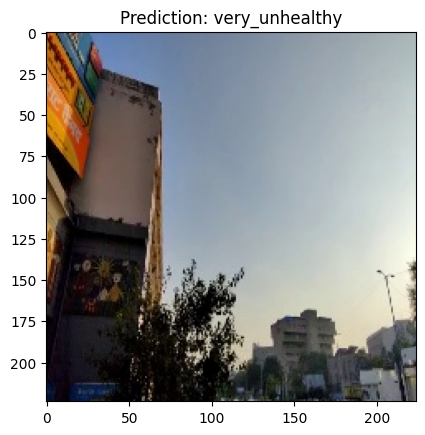

In [ ]:
def pred_and_display(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    p = np.argmax(model.predict(x))

    class_labels = ['good', 'bad','unhealthy','very_unhealthy','severe']
    prediction_label = class_labels[p]

    plt.imshow(plt.imread(img_path))
    plt.title(f'Prediction: {prediction_label}')
    plt.show()

pred_and_display('/content/drive/MyDrive/DL Project/validate/very_unhealthy/DEL_VUH_2023-02-04-17.00-2-2.jpg')


1/1 [==============================] - 0s 158ms/step


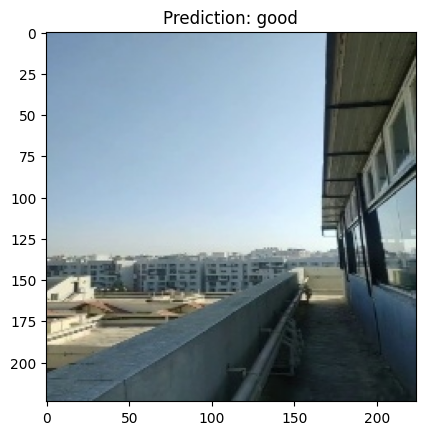

In [ ]:
def pred_and_display(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    p = np.argmax(model.predict(x))

    class_labels = ['good', 'bad','unhealthy','very_unhealthy','severe']
    prediction_label = class_labels[p]

    plt.imshow(plt.imread(img_path))
    plt.title(f'Prediction: {prediction_label}')
    plt.show()

pred_and_display('/content/drive/MyDrive/DL Project/validate/good/BENGR_Good_2023-02-28-08.30-1-651.jpg')

1/1 [==============================] - 0s 167ms/step


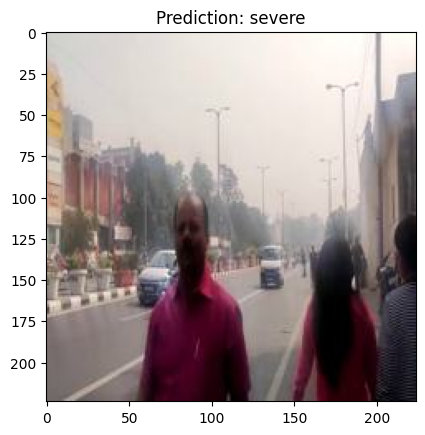

In [ ]:
def pred_and_display(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    p = np.argmax(model.predict(x))

    class_labels = ['good', 'bad','unhealthy','very_unhealthy','severe']
    prediction_label = class_labels[p]

    plt.imshow(plt.imread(img_path))
    plt.title(f'Prediction: {prediction_label}')
    plt.show()

pred_and_display('/content/drive/MyDrive/DL Project/validate/severe/DEL_SEV_2023-02-22-14.00-1-71.jpg')

1/1 [==============================] - 0s 159ms/step


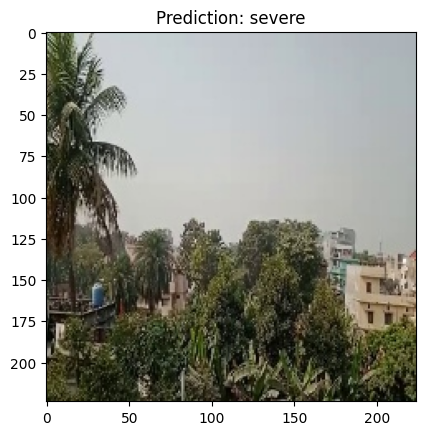

In [ ]:
def pred_and_display(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    p = np.argmax(model.predict(x))

    class_labels = ['good', 'bad','unhealthy','very_unhealthy','severe']
    prediction_label = class_labels[p]

    plt.imshow(plt.imread(img_path))
    plt.title(f'Prediction: {prediction_label}')
    plt.show()

pred_and_display('/content/drive/MyDrive/DL Project/validate/unhealthy/BIR_UNH_VF_2023-02-02- 12.00-1-69.jpg')

1/1 [==============================] - 0s 314ms/step


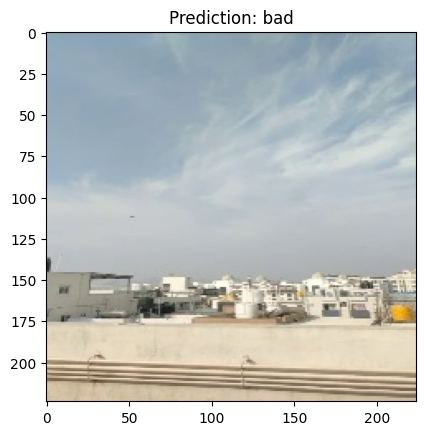

In [ ]:
def pred_and_display(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    p = np.argmax(model.predict(x))

    class_labels = ['good', 'bad','unhealthy','very_unhealthy','severe']
    prediction_label = class_labels[p]

    plt.imshow(plt.imread(img_path))
    plt.title(f'Prediction: {prediction_label}')
    plt.show()

pred_and_display('/content/drive/MyDrive/DL Project/validate/moderate/BENGR_Mod_2023-03-09-08.30-1-226.jpg')

3/3 [==============================] - 12s 3s/step
Accuracy: 0.1839080459770115
F1 Score: 0.17895614404779178
Classification Report:
                                                                  precision    recall  f1-score   support

        /content/drive/MyDrive/DL Project/train_dataset/e_severe       0.12      0.14      0.13        14
     /content/drive/MyDrive/DL Project/train_dataset/c_unhealthy       0.14      0.06      0.09        16
      /content/drive/MyDrive/DL Project/train_dataset/b_moderate       0.18      0.17      0.17        18
/content/drive/MyDrive/DL Project/train_dataset/d_very_unhealthy       0.28      0.28      0.28        18
          /content/drive/MyDrive/DL Project/train_dataset/a_Good       0.18      0.24      0.20        21

                                                        accuracy                           0.18        87
                                                       macro avg       0.18      0.18      0.17        87
                 

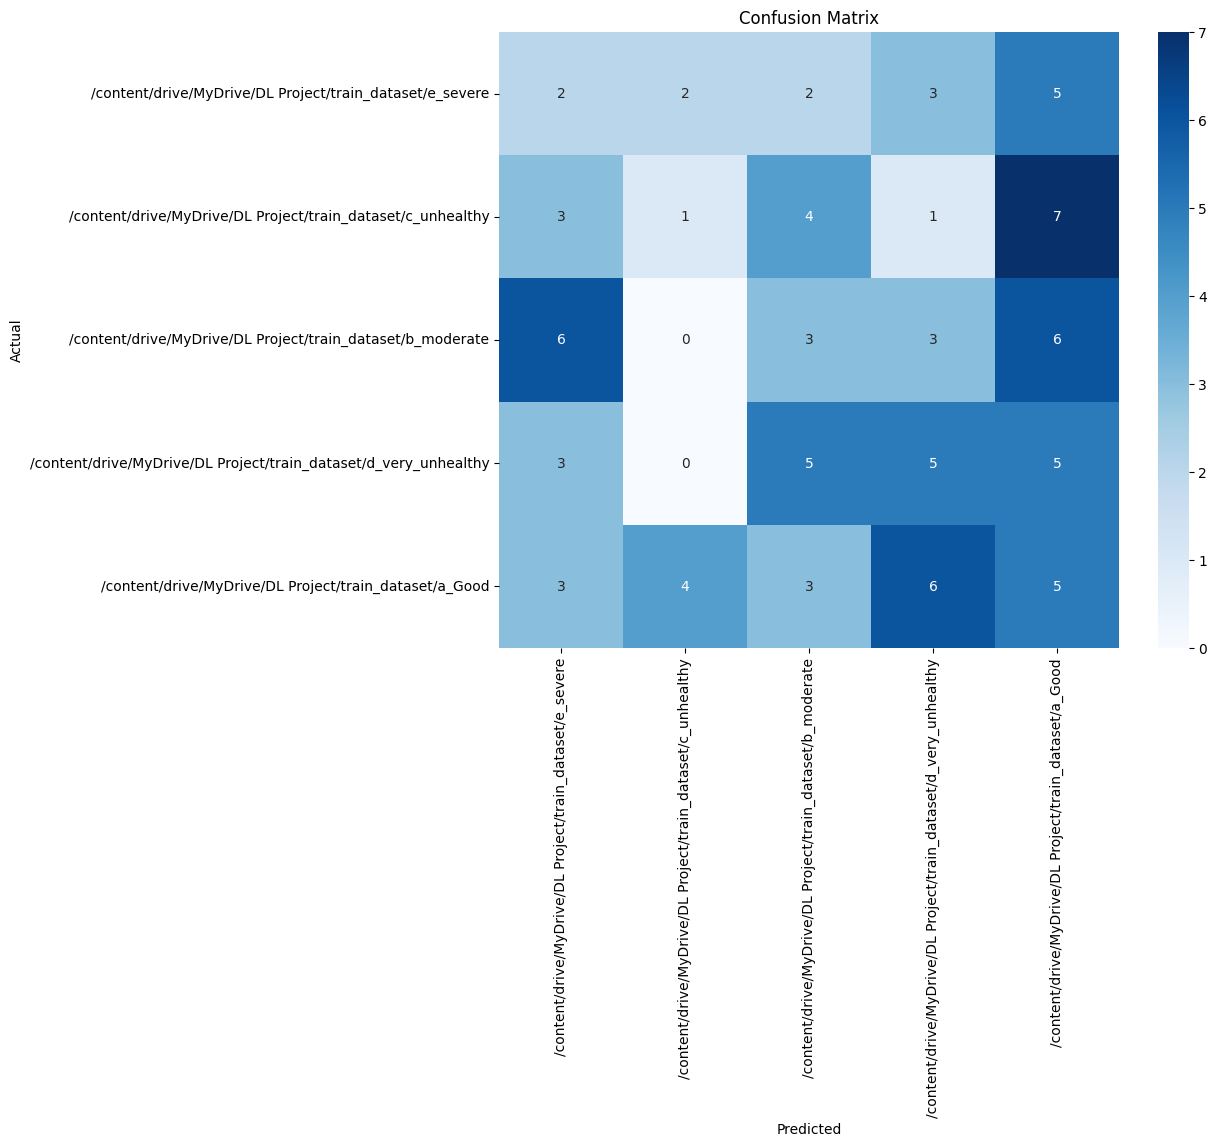

In [ ]:
# model = load_model('/content/model_inception.h5')
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Predictions on the test set
y_true = test_set.classes
y_pred_probs = model.predict(test_set)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
classification_rep = classification_report(y_true, y_pred, target_names=folders)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
                good  severe  moderate  unhealthy  very_unhealthy
good               2       2         2          3               5
severe             3       1         4          1               7
moderate           6       0         3          3               6
unhealthy          3       0         5          5               5
very_unhealthy     3       4         3          6               5


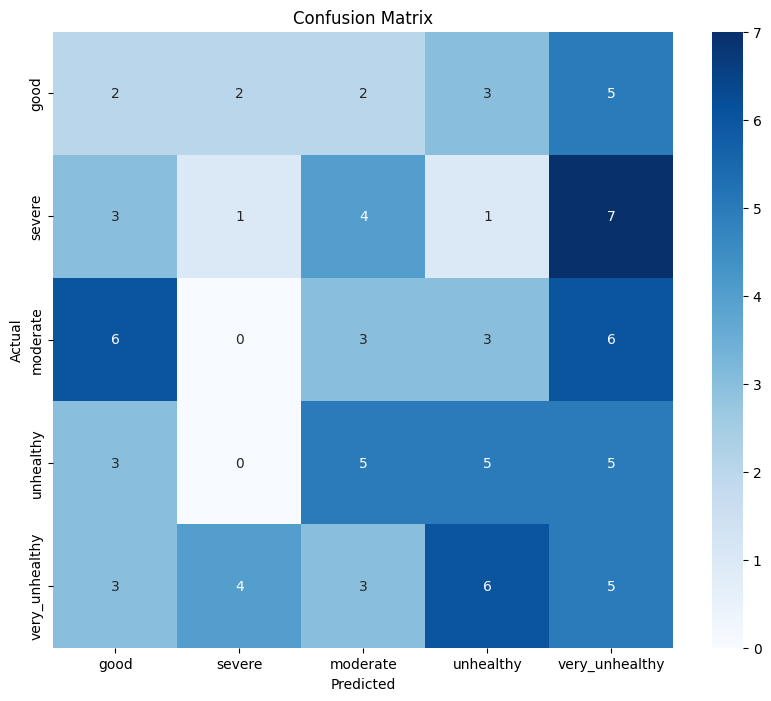

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Replace the provided values with your actual confusion matrix
conf_matrix_values = np.array([
    [2, 2, 2, 3, 5],
    [3, 1, 4, 1, 7],
    [6, 0, 3, 3, 6],
    [3, 0, 5, 5, 5],
    [3, 4, 3, 6, 5]
])

# Class labels
labels = ['good', 'severe', 'moderate', 'unhealthy', 'very_unhealthy']

# Create a DataFrame for better printing
conf_matrix_df = pd.DataFrame(conf_matrix_values, columns=labels, index=labels)

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix_df)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_values, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have an ImageDataGenerator and train/val/test directories
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/train_dataset', target_size=(299, 299), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/validate', target_size=(299, 299), batch_size=32, class_mode='categorical')
test_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/DL Project/validate', target_size=(299, 299), batch_size=32, class_mode='categorical')

# Load InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom layers for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(5, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the updated hyperparameters
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
accuracy = model.evaluate(test_generator)[1]
print(f'Accuracy on the test set: {accuracy}')




Found 115 images belonging to 5 classes.
Found 87 images belonging to 5 classes.
Found 87 images belonging to 5 classes.


Epoch 1/20
4/4 [==============================] - 194s 44s/step - loss: 1.1713 - accuracy: 0.5565 - val_loss: 6.9530 - val_accuracy: 0.2184
Epoch 2/20
4/4 [==============================] - 165s 43s/step - loss: 0.3744 - accuracy: 0.8870 - val_loss: 18.7981 - val_accuracy: 0.1609
Epoch 3/20
4/4 [==============================] - 165s 43s/step - loss: 0.1515 - accuracy: 0.9565 - val_loss: 13.6510 - val_accuracy: 0.1609
Epoch 4/20
4/4 [==============================] - 162s 47s/step - loss: 0.1804 - accuracy: 0.9913 - val_loss: 6.6994 - val_accuracy: 0.2414
Epoch 5/20
4/4 [==============================] - 151s 43s/step - loss: 0.2213 - accuracy: 0.9217 - val_loss: 13.3670 - val_accuracy: 0.2414
Epoch 6/20
4/4 [==============================] - 165s 43s/step - loss: 0.1183 - accuracy: 0.9652 - val_loss: 36.0432 - val_accuracy: 0.2414
Epoch 7/20
3/3 [==============================] - 21s 7s/step - loss: 6.6994 - accuracy: 0.2414
Accuracy on the test set: 0.24137930572032928


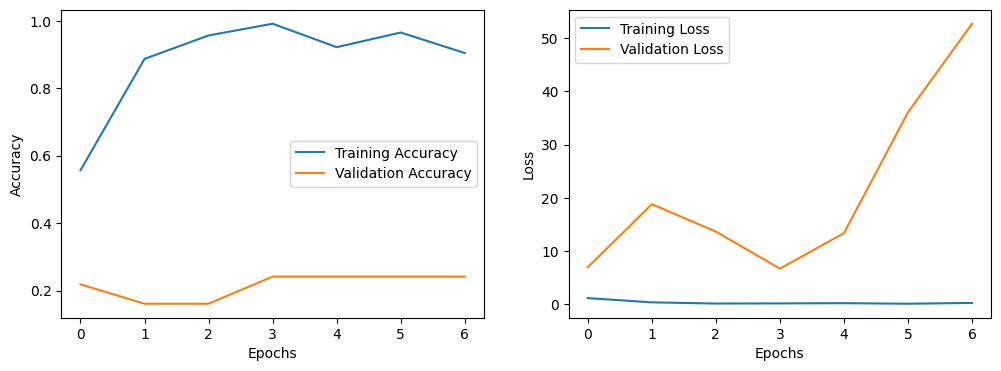

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()